
# Project: TMDB 5000 Movie Dataset Investigatigation

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>TMDB Movie Dataset is a 5000 movie description dataset, contains of several thousand films data, like popularity plot, cast, crew, budget, and revenues etc. This dataset helping us predicting which films will be highly rated, whether or not they are a commercial success in the future.

>The datasets columns are: id, imdb_id, homepage,tagline,overview,cast,  keywords, release_date   original_title, popularity, budget, revenue, director, runtime , genres, production_companies, vote_count, 'vote_average, release_year, budget_adj, revenue_adj.


In [59]:
# importing libraries that will be used in the project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import seaborn as sns


# making the matplotlib's backend to the inline backend and display the plots in the jupyters frontend
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [60]:
#loading the dataset of tmdb-movies with read_csv method
df = pd.read_csv('tmdb-movies.csv')

#printing some values of the dataset with columns and rows to get familiar with the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#printing the shape of the dataset we loaded
df.shape

(10866, 21)

In [4]:
'''checkin for the data's column data type, null and non-null valus count so we 
can see how many columns has null values'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#summing the null values in for every feature in the dataset
df_null = df.isna().sum()
df_null

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<AxesSubplot:>

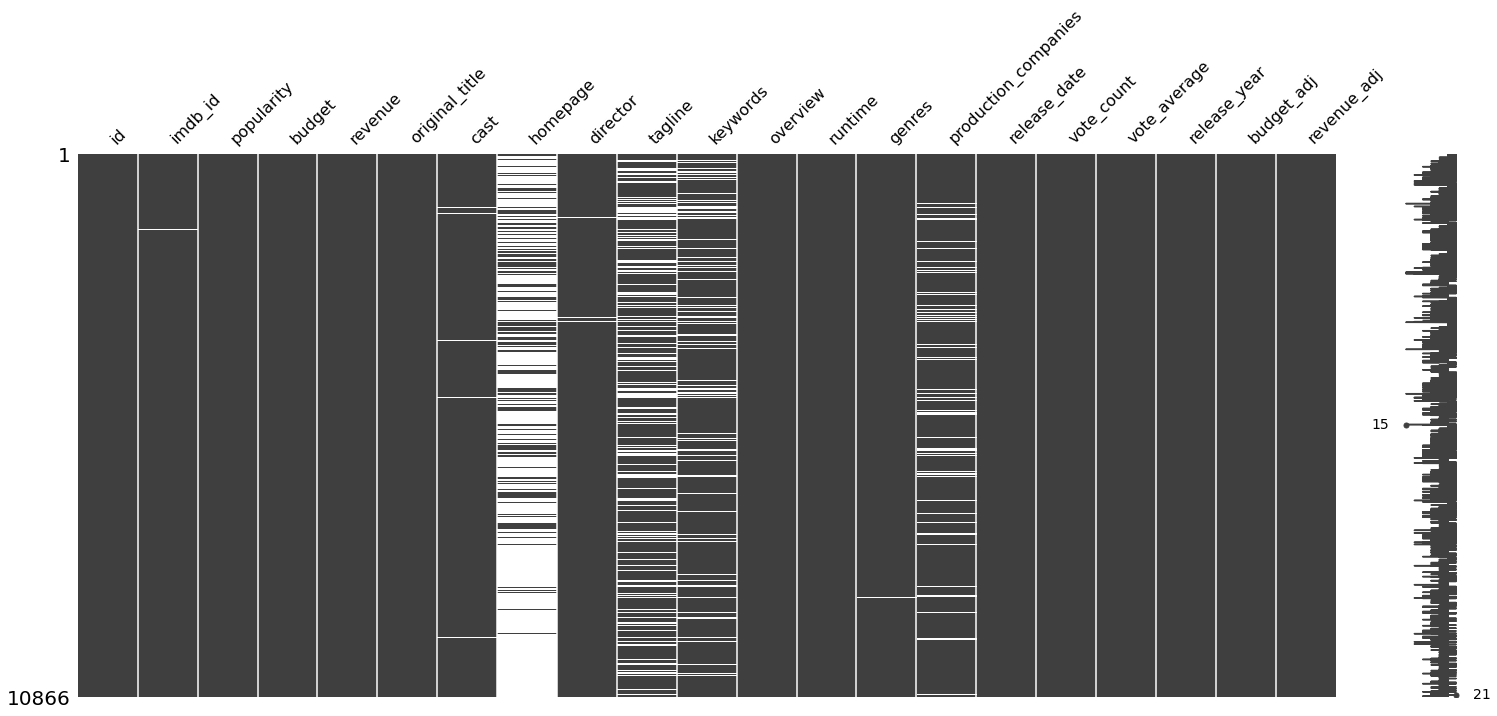

In [6]:
# checking which features has the most nulls values using missingno. lib
missingno.matrix(df)

- we can see clearly that homepage feature has the most missing values showed by the white lines in the category bar

In [7]:
df["popularity"] = 50 * df["popularity"]
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,1649.28815,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,1420.99680,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,655.62535,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,558.65520,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,466.75070,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:
''' getting insigts for the dataset we have with describe() 
method, to get values like min,mak,std,etc.
''' 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,32.322048,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,50.009247,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.003250,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,10.379138,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,19.192775,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,35.690850,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,1649.288150,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


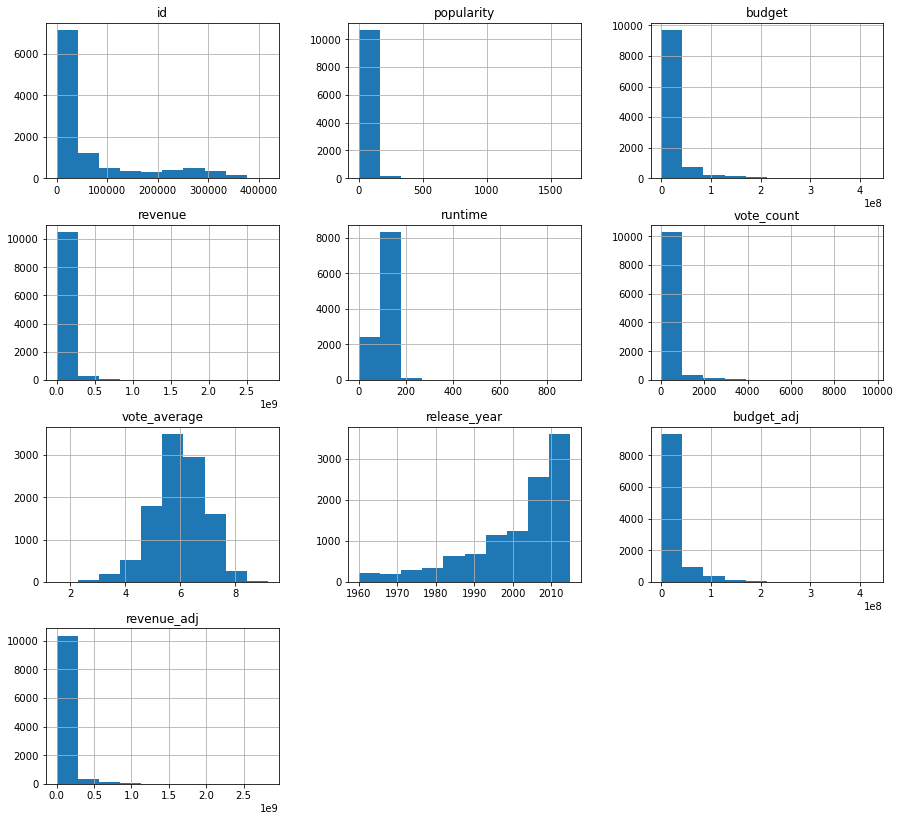

In [9]:
'''plotting the histogram of the datasets features to see how 
values changes and to see what kind of distribution they have'''

df.hist(figsize=(15,14));

In [10]:
'''counting the 0 values in Budget,
revenue, budget_adj, revenue_adj, features '''

null_in_budget = df[df.budget == 0]["original_title"].count()
null_in_revenue = df[df.revenue == 0]["original_title"].count()
null_in_budget_adj = df[df.budget_adj == 0]["original_title"].count()
null_in_revenue_adj = df[df.revenue_adj == 0]["original_title"].count()

In [11]:
null_in_budget

5696

In [12]:
null_in_revenue

6016

In [13]:
null_in_budget_adj

5696

In [14]:
null_in_revenue_adj

6016

- we can see clearly that revenue and budget columns has 0 values same as revenue_adj and budget_adj

> 1- when as shown above when the non-null data was printed, we can recognize        that some data has a null values, so then isna() method was used and            summed the null in every feature to see them clearly, these values will be      dealed with in next stage.

> 2- After used the describe method, Noticed that the Budget, revenue, budget_adj, revenue_adj, features have alot of movies that has 0 columns, so that would effect the model and make it baised if used like this.

> 3- And because of the 2th note the plotted histogram doesn't have a normal distribution.



### Data Cleaning (Replace this with more specific notes!)

In [15]:
'''first we have to deal with the missing data, as I will not use alot of
these featuers, i will drop them'''

df.drop(['id', 'imdb_id', 'homepage', 'tagline','overview','cast',"production_companies",
         'keywords'], axis = 1, inplace = True)

In [16]:
'''as I dropped the movie's id column, moving the name of the movie
at the beginning to make the dataset more readable'''

column = list(df)

column.insert(0, column.pop(column.index('original_title')))
column

['original_title',
 'popularity',
 'budget',
 'revenue',
 'director',
 'runtime',
 'genres',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [17]:
#adding these vektor of columns heads to the original dataset
df = df.loc[:, column]

#checking for the edited dataset 
df.head()

,original_title,popularity,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,1649.28815,150000000,1513528810,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,1420.99680,150000000,378436354,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,Insurgent,655.62535,110000000,295238201,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,558.65520,200000000,2068178225,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Furious 7,466.75070,190000000,1506249360,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
#checking for duplicated values
sum(df.duplicated())

1

In [19]:
#droping the duplicated values,and checking after that
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [20]:
'''
there are alot of ways to refill, drop the 0 values of the columns 
here i replaces its values with the mean, as the count of the 0 values columns are too much 
deleting the entire row would be loosing alot of data
'''
# 1- budget column 

budget_column = df['budget']
budget_column.replace(to_replace = 0, value = budget_column.mean(), inplace=True)

# 2- revenue column 
revenue_column = df['revenue']
revenue_column.replace(to_replace = 0, value = revenue_column.mean(), inplace=True)

# 3- budget_adj column
budget_adj_column = df['budget_adj']
budget_adj_column.replace(to_replace = 0, value = budget_adj_column.mean(), inplace=True)

# 4- revenue_adj column
revenue_adj_column = df['revenue_adj']
revenue_adj_column.replace(to_replace = 0, value = revenue_adj_column.mean(), inplace=True)

In [21]:
#checkking for the 0 values in budget column
df[df.budget == 0]["original_title"].count()

0

In [22]:
#checkking for the 0 values in revenue column
df[df.revenue == 0]["original_title"].count()

0

In [23]:
#checkking for the 0 values in budget_adj column
df[df.budget_adj == 0]["original_title"].count()

0

In [24]:
#checkking for the 0 values in revenue_adj column
df[df.revenue_adj == 0]["original_title"].count()

0

In [25]:
#filling the missing data in "genres" director column with "other" using fillna
df.genres.fillna("other", inplace = True)
df.director.fillna("other", inplace = True)

In [26]:
#confirming for NaN values after cleaning 
df.isna().sum()

original_title    0
popularity        0
budget            0
revenue           0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis



### Are Voilent(Action) movies are making more revenue than non-Action movies?

In [27]:
dfer = df.query('vote_average in ["Action", "Drama"]').genres.nunique()

In [28]:
veh_08 = df.groupby(['genres']).vote_average.mean()
veh_08


genres
Action                                      5.526984
Action|Adventure                            5.333333
Action|Adventure|Animation                  6.775000
Action|Adventure|Animation|Comedy|Drama     5.600000
Action|Adventure|Animation|Comedy|Family    6.100000
                                              ...   
Western|History                             6.000000
Western|History|War                         5.900000
Western|Horror|Thriller                     4.400000
Western|Thriller                            5.700000
other                                       6.421739
Name: vote_average, Length: 2040, dtype: float64

In [29]:
Action11= df.query('genres == "Action"')


In [30]:
Action11.vote_count.value_counts()

13      6
21      4
10      4
18      2
14      2
11      2
24      2
12      2
329     1
320     1
161     1
32      1
35      1
16      1
15      1
2349    1
197     1
195     1
244     1
212     1
31      1
69      1
92      1
19      1
25      1
180     1
169     1
27      1
53      1
26      1
43      1
42      1
22      1
87      1
116     1
57      1
23      1
257     1
849     1
367     1
844     1
553     1
20      1
90      1
359     1
54      1
45      1
Name: vote_count, dtype: int64

In [31]:
# filtering the Action category movies that was in the genres feature 
Action_mask = df[df['genres'].str.contains('Action')]

In [32]:
# filtering the Non-Action category movies that was in the genres feature 
Not_Action_mask = df[~df["genres"].str.contains("Action")]

In [33]:

'''dividing the numerical values of the revenue columns into categroies so I can plot them easily 
and see which is the action or non action movies is making higher revenue'''

Action_mask_bins = pd.cut(x =Action_mask["revenue"],bins = [-np.inf,1000000, 2000000,3000000,
                                                            4000000,5000000,np.inf],
                                          labels = ["0-1000k","1000k-2000k","2000k-3000k",
                                                    "3000k-4000k",
                                                    "4000k-5000k","5000k-inf"])

Not_Action_mask_bins = pd.cut(x =Not_Action_mask["revenue"],bins = [-np.inf,1000000, 2000000,3000000,
                                                                    4000000,5000000,np.inf],
                                          labels = ["0-1000k","1000k-2000k","2000k-3000k",
                                                    "3000k-4000k",
                                                    "4000k-5000k","5000k-inf"])

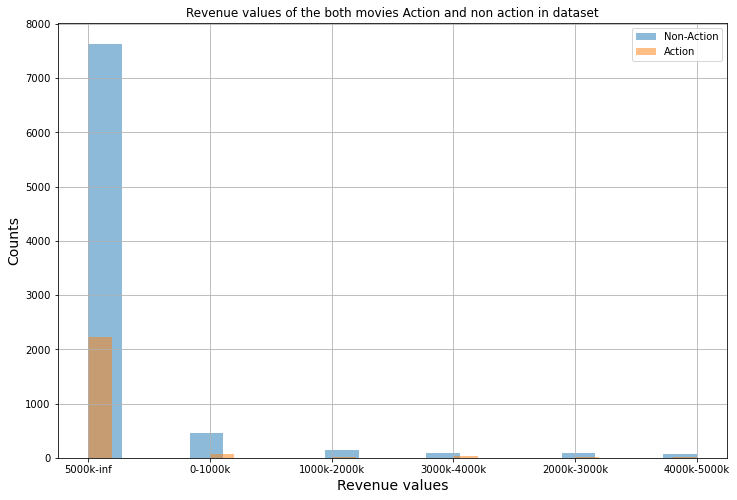

In [34]:
'''
plotting the action and non action movies revenue values to compare them easily 
'''
plt.figure(figsize=(12,8))
Not_Action_mask_bins.hist(alpha = 0.5,bins =18, label = "Non-Action");
Action_mask_bins.hist(alpha = 0.5,bins =25,label = "Action");
plt.title( "Revenue values of the both movies Action and non action in dataset")
plt.xlabel("Revenue values", fontsize=14, c='k')
plt.ylabel( "Counts", fontsize=14, c="k")
plt.legend();

> - There is a big difference in the count of non-action movies that making higher revenue than action movies.

### Is papularity of a movie effected by its revenue?

In [35]:
# to see the min and max of the popularity feature to apply operations on it
df["popularity"].describe()

count    10865.000000
mean        32.322278
std         50.011543
min          0.003250
25%         10.378750
50%         19.191550
75%         35.692850
max       1649.288150
Name: popularity, dtype: float64

In [36]:
#cutting popularity values into chunks to see the count of popularity values
popularity_val_bins = pd.cut(x =df["popularity"],bins = [-np.inf,0.5, 5,10,15,20,np.inf],
                                          labels = ["0-0.5","0.5-5","5-10","10-15","15-20","20-inf"])

In [37]:
#checking for the chunks
popularity_val_bins.unique()

['20-inf', '15-20', '10-15', '5-10', '0.5-5', '0-0.5']
Categories (6, object): ['0-0.5' < '0.5-5' < '5-10' < '10-15' < '15-20' < '20-inf']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


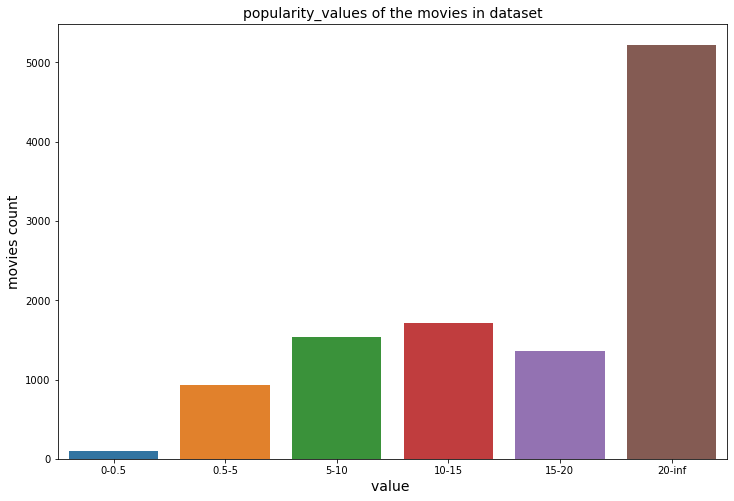

In [38]:
#plotting the chunck values of popularity feature

plt.figure(figsize=(12,8))
sns.countplot(popularity_val_bins);
plt.title( "popularity_values of the movies in dataset", fontsize=14, c="k")
plt.xlabel("value ", fontsize=14, c='k')
plt.ylabel( "movies count", fontsize=14, c="k")
plt.show()

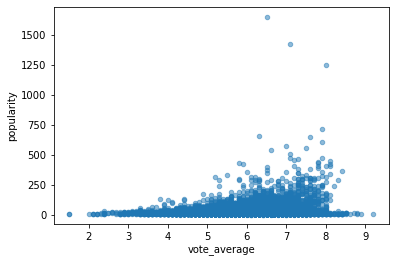

In [39]:
# seeing if there is a relationship between popularity and vote_average
df.plot(kind="scatter",x = "vote_average",y = "popularity",alpha=0.5);

> - as we can see clearly some values like 6,7 has a positive correlation popularity and vote_average

### What properties changes through the change in years?

In [40]:
# rounding the vote_average values so we can plot them clearly and compare them easily 
df['vote_average'] = df['vote_average'].apply(np.floor)
df.head()

,original_title,popularity,budget,revenue,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,Jurassic World,1649.28815,150000000.0,1.513529e+09,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.0,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,1420.99680,150000000.0,3.784364e+08,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.0,2015,1.379999e+08,3.481613e+08
2,Insurgent,655.62535,110000000.0,2.952382e+08,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.0,2015,1.012000e+08,2.716190e+08
3,Star Wars: The Force Awakens,558.65520,200000000.0,2.068178e+09,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.0,2015,1.839999e+08,1.902723e+09
4,Furious 7,466.75070,190000000.0,1.506249e+09,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.0,2015,1.747999e+08,1.385749e+09


In [41]:
"""
catogorizing release_yeare row to eather before or after 2000 year,
so we can see the difference between the 19th and 20th differences
"""

df["release_year"] = np.where(df["release_year"] >= 2000, 0, 1)
df["release_year"].unique()

array([0, 1])

In [42]:
# creating variable for each category for the saek of easiness
after_2000 = df.release_year == True
before_2000 = df.release_year == False

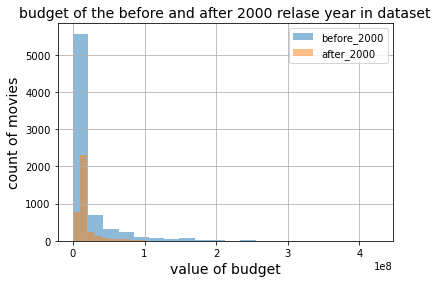

In [43]:
#plotting the histogram of both categories budgets

df.budget[before_2000].hist(alpha=0.5, bins=20, label='before_2000')
df.budget[after_2000].hist(alpha=0.5, bins=20, label='after_2000')
plt.legend()
plt.title( "budget of the before and after 2000 relase year in dataset", fontsize=14, c="k")
plt.xlabel("value of budget", fontsize=14, c='k')
plt.ylabel( "count of movies", fontsize=14, c="k")
plt.show()

> - we can see clearly that budget of before_2000 feature has value near to zero and thats because
the data of budget in that featue was 0 at the dates before 2000 and by taking mean() of them its normal to see such a result 

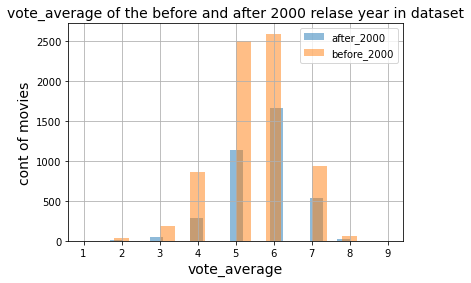

In [44]:
# plotting vote_average feature in both after and before 2000 to compare them using histograms
df.vote_average[after_2000].hist(alpha=0.5, bins=20, label='after_2000')
df.vote_average[before_2000].hist(alpha=0.5, bins=20, label='before_2000')
plt.legend();
plt.title( "vote_average of the before and after 2000 relase year in dataset", fontsize=14, c="k")
plt.xlabel("vote_average", fontsize=14, c='k')
plt.ylabel( "cont of movies", fontsize=14, c="k")
plt.show()

> - Clearly we can see that the before category has highest vote_average than the after_2000 category
and its the most on 5,6 votes

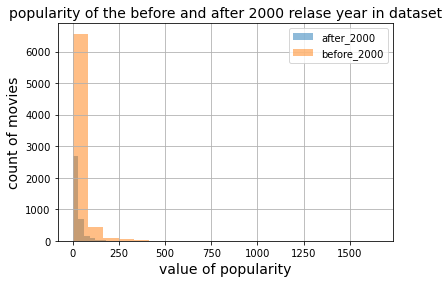

In [45]:
df.popularity[after_2000].hist(alpha=0.5, bins=20, label='after_2000')
df.popularity[before_2000].hist(alpha=0.5, bins=20, label='before_2000')
plt.legend()
plt.title( "popularity of the before and after 2000 relase year in dataset", fontsize=14, c="k")
plt.xlabel("value of popularity", fontsize=14, c='k')
plt.ylabel( "count of movies", fontsize=14, c="k")
plt.show();

> -  here also the budget of before_2000 feature has value near to zero and thats because
the data of budget in that featue was 0 at the dates before 2000 and by taking mean() of them its normal to see such a result 

### What properties effect the revenue?

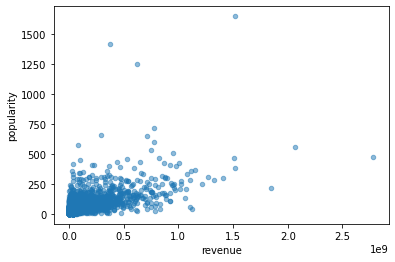

In [46]:
# plotting the scatter values to see if there is a corealtion 
df.plot(kind="scatter",x = "revenue",y = "popularity",alpha=0.5);

> - as we can see clearly there is a positive corealation between revenue and popularity

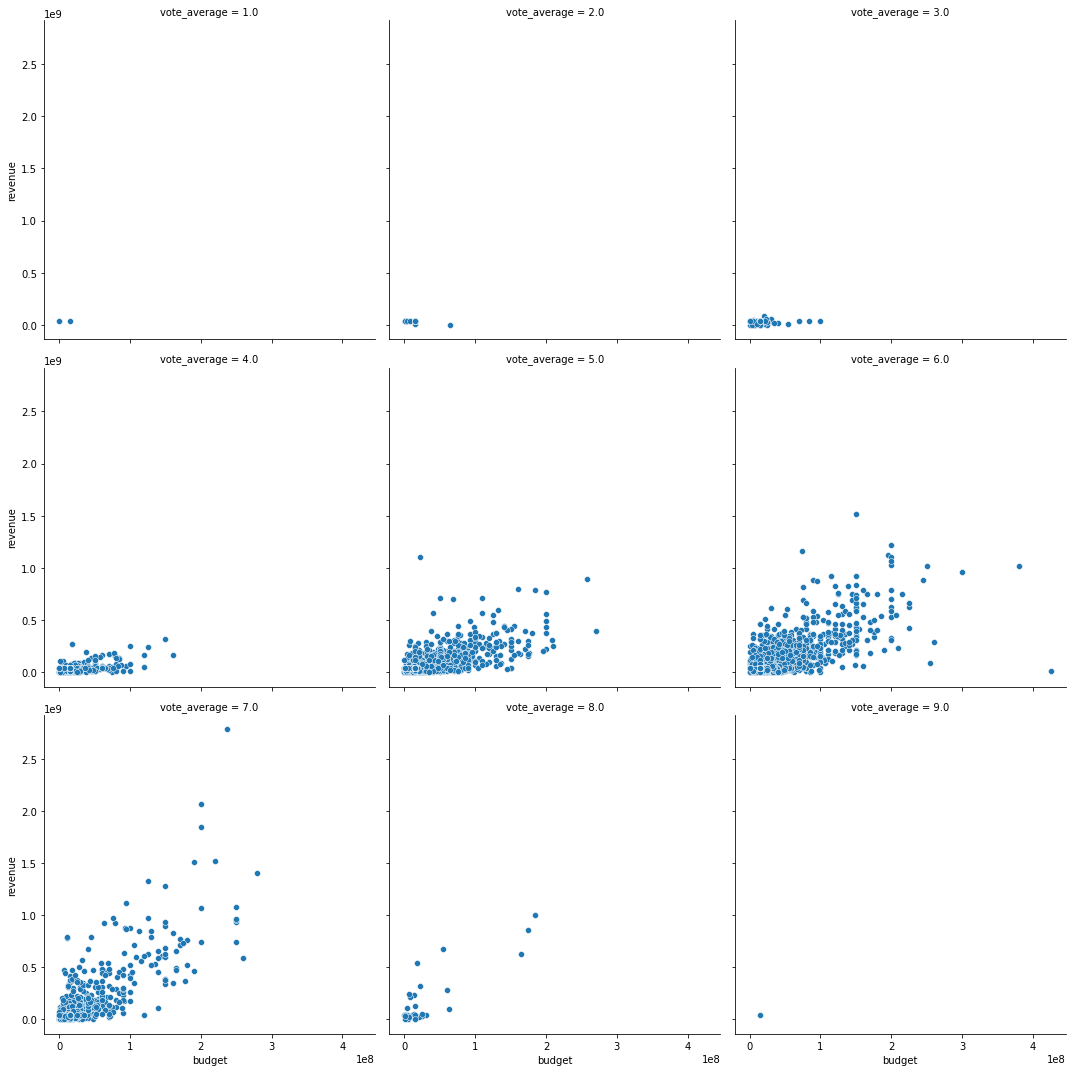

In [47]:

sns.relplot(x='budget', y='revenue', data=df, kind='scatter', 
            col='vote_average', col_wrap=3)
plt.show()

> -  we can here see the strong positive corelations between budget and revenue for each vote average category, as as we said before we can see that 5.0 6.0 and 7.0 has the most strong positive corelations between budget and revenue

### What is the most 15 movies made highest revenue?

In [48]:
# variable for the most high 15 movies according to thier revenues
top_rev = df.nlargest(15,"revenue")[["original_title", "revenue"]]

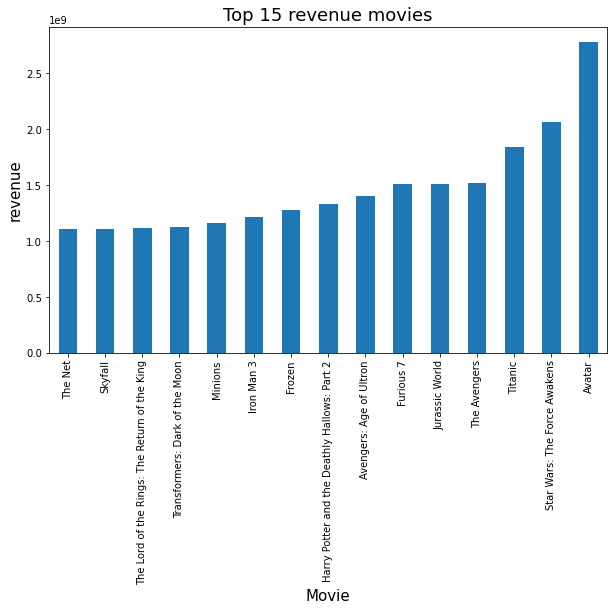

In [49]:

#plotting the movies names and thier revenue
plt.figure(figsize=(10,6))
top_rev.groupby("original_title")["revenue"].sum().sort_values().plot(kind="bar")
plt.ylabel("revenue",fontsize=15, color="k")
plt.xlabel("Movie",fontsize=15, color="k")
plt.title("Top 15 revenue movies", fontsize=18, color="k")
plt.show()


In [50]:
# top movies revenue name and how much profit it made
top_rev.max()

original_title    Transformers: Dark of the Moon
revenue                             2781505847.0
dtype: object

<a id='conclusions'></a>
## Conclusions


- the highest movie made revenue made a 2781505847.0 and its Transformers: Dark of the Moon.
- the genres of a movie is very good feature that we can use it to predict alot of things like profits and budget etc. for example used to see how the budget and revenue is changing in violence movies.
- the count count of popular movies is the most between 20-32 popularity value.
- there is a strong positive correlation between vote_average and popularity features. and we can see clearly its baised at the 5,6 vote_averages so when splitting data we have to keep this in mind
- we can see the huge difference in release years feature according to the vote_average and popularity features which makes a bit suspicious and making us checking these columns.
- one of the most important features the revenue feature we saw how its effected by other features like vote_average and popularity by applying the correlation between them.


#### The limitation:
- some of the data has nig amount of null data Like homepage had 7930 NaN values.
- the papularity values was scaled with a mean of 32 which is too small that needs to multiblied by a scaler to compare other feature with it.
- the data features haven't a normal distripution and this is because that some values was filled with 0 espacially the budget and revenue features which made the data baised.
- budget had a 5696 null values,revenue column had a 6016 null values, also budget_adj and revenue_adj has the same null values.




,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10861,Documentary,None,None,None,None
10862,Action,Adventure,Drama,None,None
10863,Mystery,Comedy,None,None,None
10864,Action,Comedy,None,None,None


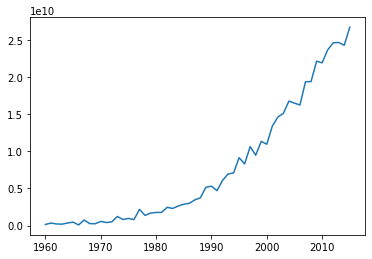

In [71]:
plt.plot(df.groupby('release_year').sum()['revenue'])